In [1]:
pip install qiskit-aer

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Imports

In [3]:
from qiskit import QuantumCircuit, execute, Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

In [4]:
#Rappel de l'enigme: La porte au trésor
#Nous nous retrouvons devant deux portes, l'une d'entre elle contient un trésor. Mais nous ne savons pas laquelle.
#Devant chaque porte se trouve un gardien, ces derniers savent derrière quelle porte se trouve le trésor.
#L'un d'eux ment toujours et à l'inverse, l'autre dit toujours la vérité.
#Nous ne savons pas quel gardien ment, ni lequel dit la vérité, mais chaque gardien sait si l'autre ment.
#Nous avons pour mission de poser une question à un seul des gardiens et de découvrir derrière quelle porte se
#trouve le trésor.

In [5]:
#Commençons par dessiner notre circuit de base q0 et q1 représentant les gardiens, nous parlerons de q2 plus tard

In [6]:
q = QuantumRegister(3)

In [7]:
c = ClassicalRegister(1)

In [8]:
cir = QuantumCircuit(q,c)

/home/9eebf5fd-8a1e-4f6a-b68a-cf559ae366a8/.local/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


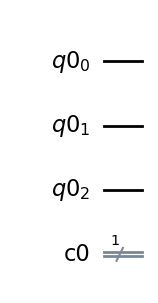

In [9]:
cir.draw('mpl')

In [10]:
#Dessinons une porte Hadamard sur q0 (représentant la probabilité que le trésor se trouve derrière)
#et d'une porte CNOT de q0 à q1 afin de demontrer que les deux gardiens
#savent la même chose

In [11]:
cir.h(0)

In [12]:
cir.cx(0,1)

In [13]:
cir.h(2)

In [14]:
cir.cx(2,1)

In [15]:
cir.x(2)

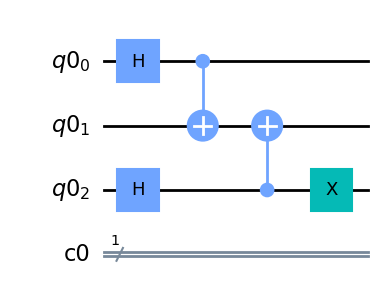

In [16]:
cir.draw('mpl')

In [17]:
cir.cx(2,0)

In [18]:
cir.x(2)

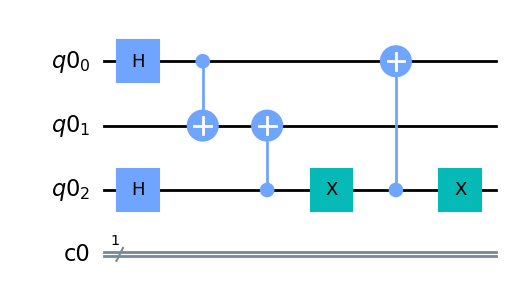

In [19]:
cir.draw('mpl')

In [20]:
cir.swap(0,1)

In [21]:
cir.x(0)

In [22]:
cir.x(1)

In [23]:
cir.cx(2,1)

In [24]:
cir.x(2)

In [25]:
cir.cx(2,0)

In [26]:
cir.x(2)

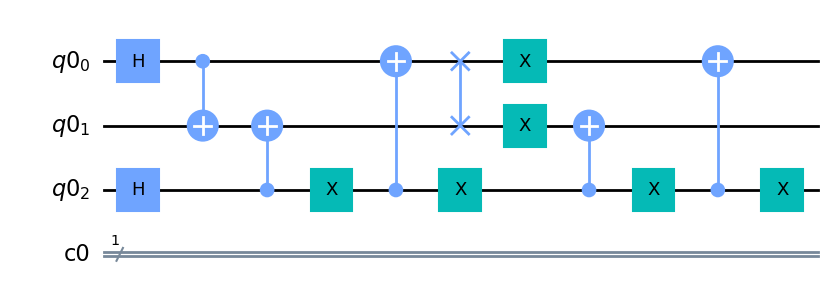

In [27]:
cir.draw('mpl')

In [28]:
cir.measure_all()

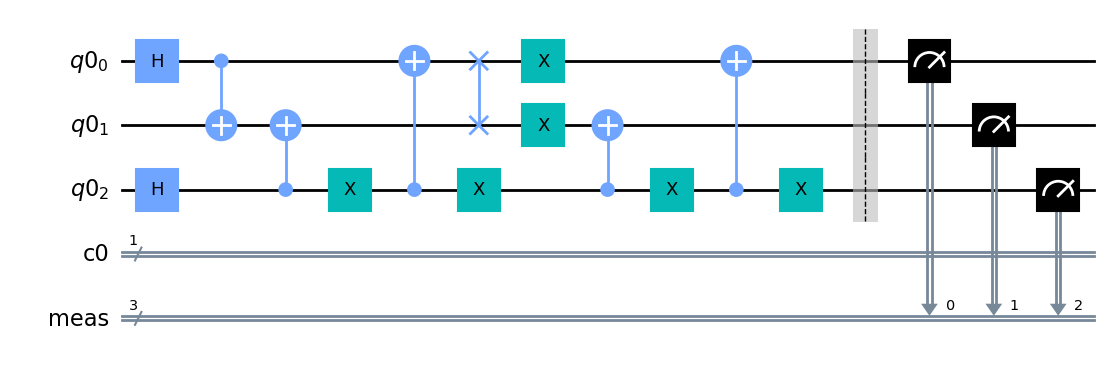

In [29]:
cir.draw('mpl')

In [30]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(cir, backend=simulator, shots=1024).result()

In [31]:
counts = result.get_counts(cir)
print(counts)

{'111 0': 244, '011 0': 228, '000 0': 276, '100 0': 276}


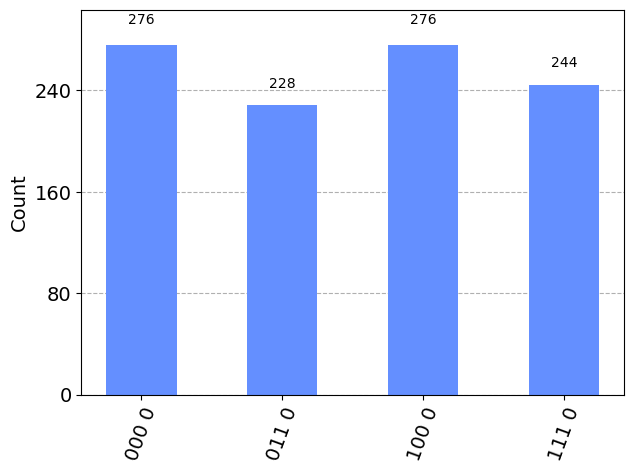

In [32]:
plot_histogram(counts)